# Load in libraries

In [29]:
import pandas as pd ##
import numpy as np ##
import seaborn as sns ## plotting
import matplotlib.pyplot as plt ## # plotting
import os
import missingno

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install plotly

In [4]:
!pip install missingno

In [5]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


# Read file

In [17]:
data_path = "C:/Users/gebruiker/Documents/Sanne/UM GZW/Master Systems Biology/MSB1015 Scientific Programming/Project/MSB1015-SV-1/Alzheimer_Disease_Healthy_Aging_Data.xlsx"

if not os.path.exists(data_path):
    raise FileNotFoundError(
        f"Dataset not found at {data_path}. "
        "Please manually place the dataset in the 'data/' folder (do not upload it to GitHub)."
    )

Alzheimers = pd.read_excel(data_path)
print("Dataset successfully loaded:", Alzheimers.shape)


Dataset successfully loaded: (250937, 16)


# Data explore

In [15]:
# Lees het Excel-bestand in

# df_1 = pd.read_excel("Alzheimer_Disease_Healthy_Aging_Data.xlsx")

# Bekijk de dataset
# df_1


In [18]:
# Let´s see the dataset
Alzheimers 

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,BRFSS~2015~2015~01~Q01~TNC01~AGE~GENDER,2015,2015,AL,Alabama,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,14.6,21.2,Percentage,17.7,50-64 years,Male,NaN,POINT (-86.63186076199969 32.84057112200048)
1,BRFSS~2015~2015~01~Q01~TNC01~AGE~GENDER,2015,2015,AL,Alabama,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,13.2,18.9,Percentage,15.9,65 years or older,Male,NaN,POINT (-86.63186076199969 32.84057112200048)
2,BRFSS~2015~2015~01~Q01~TNC01~AGE~GENDER,2015,2015,AL,Alabama,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,17.6,21.3,Percentage,19.4,NaN,Female,NaN,POINT (-86.63186076199969 32.84057112200048)
3,BRFSS~2015~2015~01~Q01~TNC01~AGE~GENDER,2015,2015,AL,Alabama,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,15.7,20.8,Percentage,18.1,50-64 years,Female,NaN,POINT (-86.63186076199969 32.84057112200048)
4,BRFSS~2015~2015~01~Q01~TNC01~AGE~GENDER,2015,2015,AL,Alabama,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,18.4,23.7,Percentage,20.9,65 years or older,Female,NaN,POINT (-86.63186076199969 32.84057112200048)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,BRFSS~2021~2021~9004~Q46~TOC10~AGE~RACE,2021,2021,WEST,West,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,46.3,67.3,Percentage,57.1,65 years or older,NaN,Native Am/Alaskan Native,NaN
250933,BRFSS~2021~2021~9004~Q46~TOC10~AGE~RACE,2021,2021,WEST,West,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,43.4,54,Percentage,48.7,65 years or older,NaN,Hispanic,NaN
250934,BRFSS~2021~2021~9004~Q46~TOC10~AGE~RACE,2021,2021,WEST,West,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,33.4,56.4,Percentage,44.6,65 years or older,NaN,"Black, non-Hispanic",NaN
250935,BRFSS~2021~2021~9004~Q46~TOC10~AGE~RACE,2021,2021,WEST,West,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,18.2,30.2,Percentage,23.7,NaN,NaN,Asian/Pacific Islander,NaN


In [19]:
Alzheimers.describe()

,YearStart,YearEnd,Data_Value
count,250937.000000,250937.000000,169302.000000
mean,2017.940933,2018.169716,37.328349
std,2.031564,2.081039,25.213181
min,2015.000000,2015.000000,0.000000
25%,2016.000000,2016.000000,15.700000
50%,2018.000000,2018.000000,32.300000
75%,2020.000000,2020.000000,56.000000
max,2021.000000,2021.000000,100.000000


In [20]:
Alzheimers.dtypes

RowId                     object
YearStart                  int64
YearEnd                    int64
LocationAbbr              object
LocationDesc              object
Class                     object
Topic                     object
Question                  object
Low_Confidence_Limit      object
High_Confidence_Limit     object
Data_Value_Type           object
Data_Value               float64
Age                       object
Gender                    object
Ethnicity                 object
Geolocation               object
dtype: object

In [22]:
Alzheimers['High_Confidence_Limit'] = pd.to_numeric(Alzheimers['High_Confidence_Limit'], errors='coerce')
Alzheimers['Low_Confidence_Limit'] = pd.to_numeric(Alzheimers['Low_Confidence_Limit'], errors='coerce')
Alzheimers['Age'] = Alzheimers['Age'].astype('category')
Alzheimers.describe()

,YearStart,YearEnd,Low_Confidence_Limit,High_Confidence_Limit,Data_Value
count,250937.000000,250937.000000,169126.000000,169126.000000,169302.000000
mean,2017.940933,2018.169716,32.698188,42.243840,37.328349
std,2.031564,2.081039,24.288904,26.165896,25.213181
min,2015.000000,2015.000000,-0.700000,1.400000,0.000000
25%,2016.000000,2016.000000,12.400000,19.400000,15.700000
50%,2018.000000,2018.000000,26.600000,38.300000,32.300000
75%,2020.000000,2020.000000,48.400000,64.000000,56.000000
max,2021.000000,2021.000000,99.600000,100.000000,100.000000


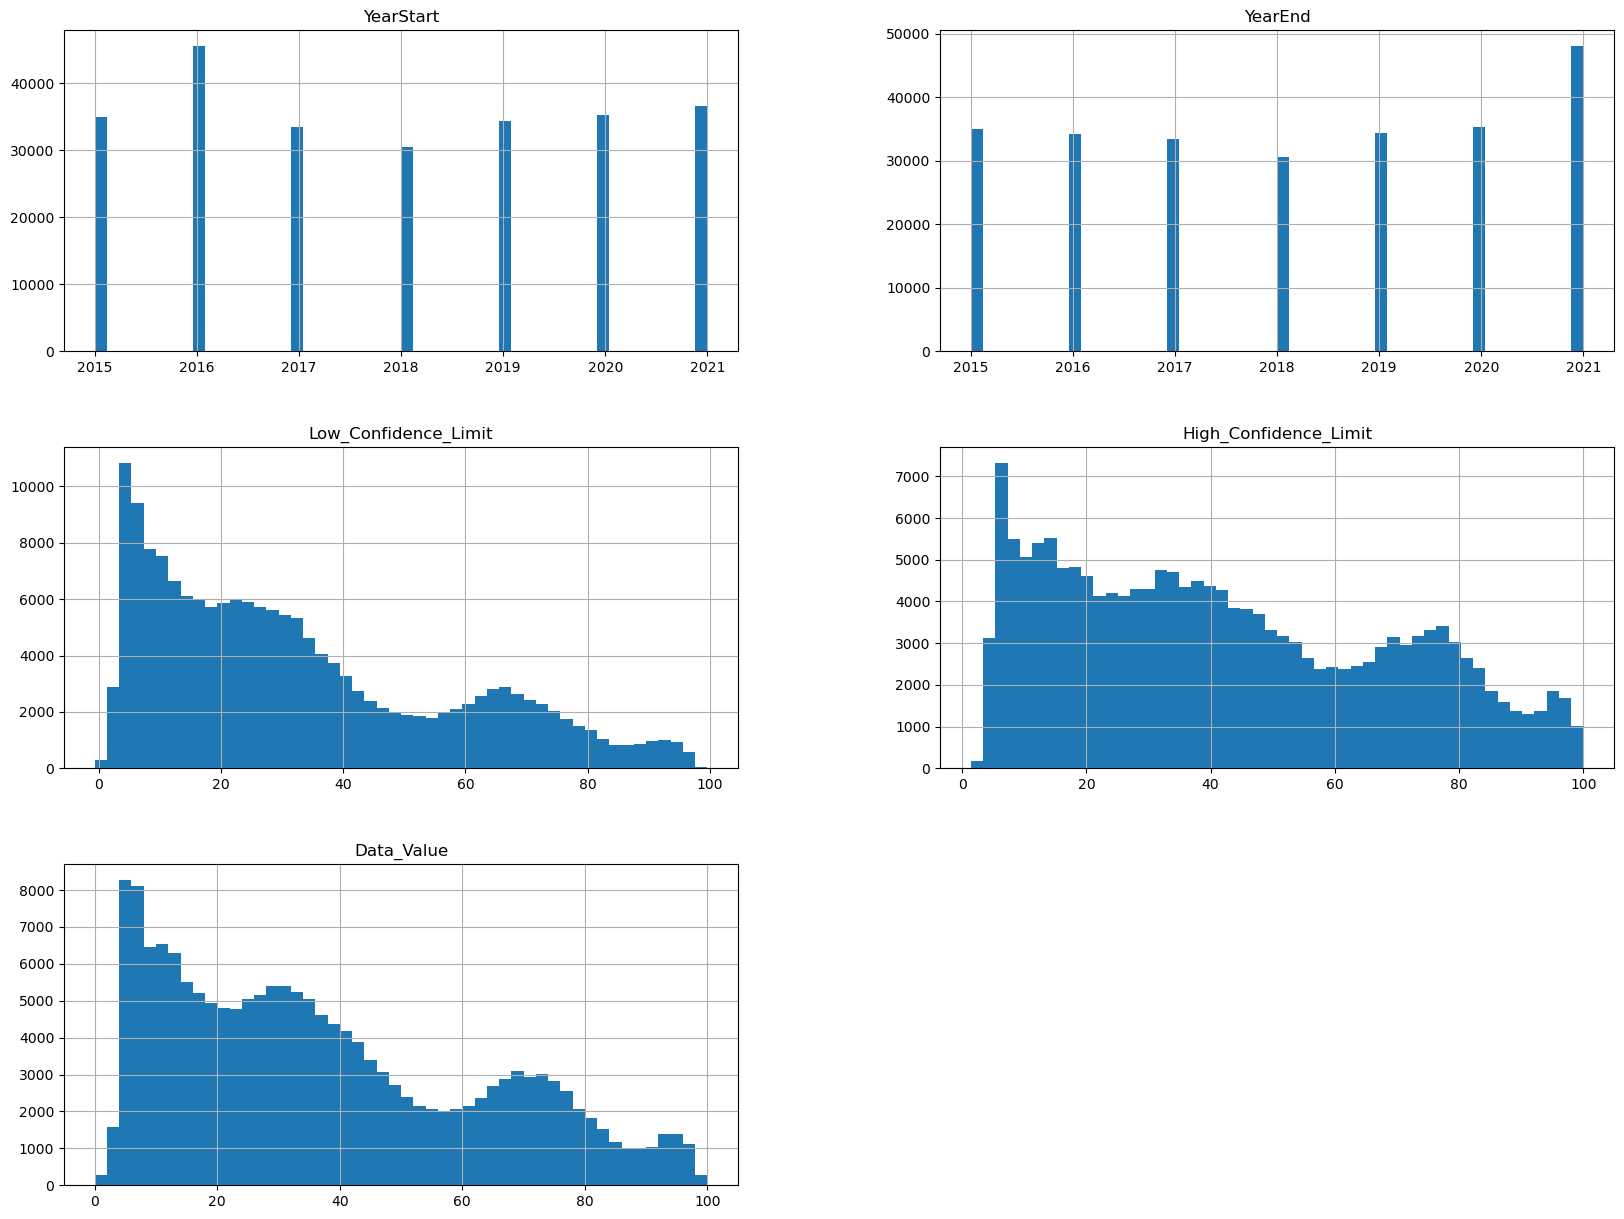

In [23]:
Alzheimers.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
Alzheimers.Class.value_counts()

Class
Overall Health                         84091
Screenings and Vaccines                52297
Nutrition/Physical Activity/Obesity    30376
Caregiving                             24427
Cognitive Decline                      21015
Mental Health                          19366
Smoking and Alcohol Use                19365
Name: count, dtype: int64

In [25]:
for col in Alzheimers.columns:
    print(f"Value counts voor kolom: {col}")
    print(Alzheimers[col].value_counts())
    print("-" * 40)

Value counts voor kolom: RowId
RowId
BRFSS~2021~2021~9004~Q46~TOC10~AGE~RACE     15
BRFSS~2020~2020~01~Q13~TNC04~AGE~RACE       15
BRFSS~2020~2020~01~Q11~TSC11~AGE~RACE       15
BRFSS~2016~2021~15~Q36~TGC01~AGE~RACE       15
BRFSS~2020~2020~01~Q10~TSC10~AGE~RACE       15
                                            ..
BRFSS~2019~2019~66~Q27~TMC03~AGE~OVERALL     3
BRFSS~2016~2021~32~Q41~TCC03~AGE~OVERALL     3
BRFSS~2019~2019~66~Q32~TOC07~AGE~OVERALL     3
BRFSS~2016~2021~32~Q40~TGC05~AGE~OVERALL     3
BRFSS~2018~2018~26~Q13~TNC04~AGE~OVERALL     3
Name: count, Length: 31676, dtype: int64
----------------------------------------
Value counts voor kolom: YearStart
YearStart
2016    45627
2021    36649
2020    35310
2015    35020
2019    34354
2017    33429
2018    30548
Name: count, dtype: int64
----------------------------------------
Value counts voor kolom: YearEnd
YearEnd
2021    48131
2020    35310
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: count, dt

In [26]:
Alzheimers.isnull().sum()

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81811
High_Confidence_Limit     81811
Data_Value_Type               0
Data_Value                81635
Age                       84147
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64

In [28]:
missing_percent = Alzheimers.isnull().mean() * 100

# Filter kolommen met meer dan 30% missende waarden
columns_above_30 = missing_percent[missing_percent > 30]

# Toon de kolomnamen en hun missings-percentage
print(columns_above_30)

Low_Confidence_Limit     32.602207
High_Confidence_Limit    32.602207
Data_Value               32.532070
Age                      33.533118
Gender                   75.869641
Ethnicity                37.032403
dtype: float64


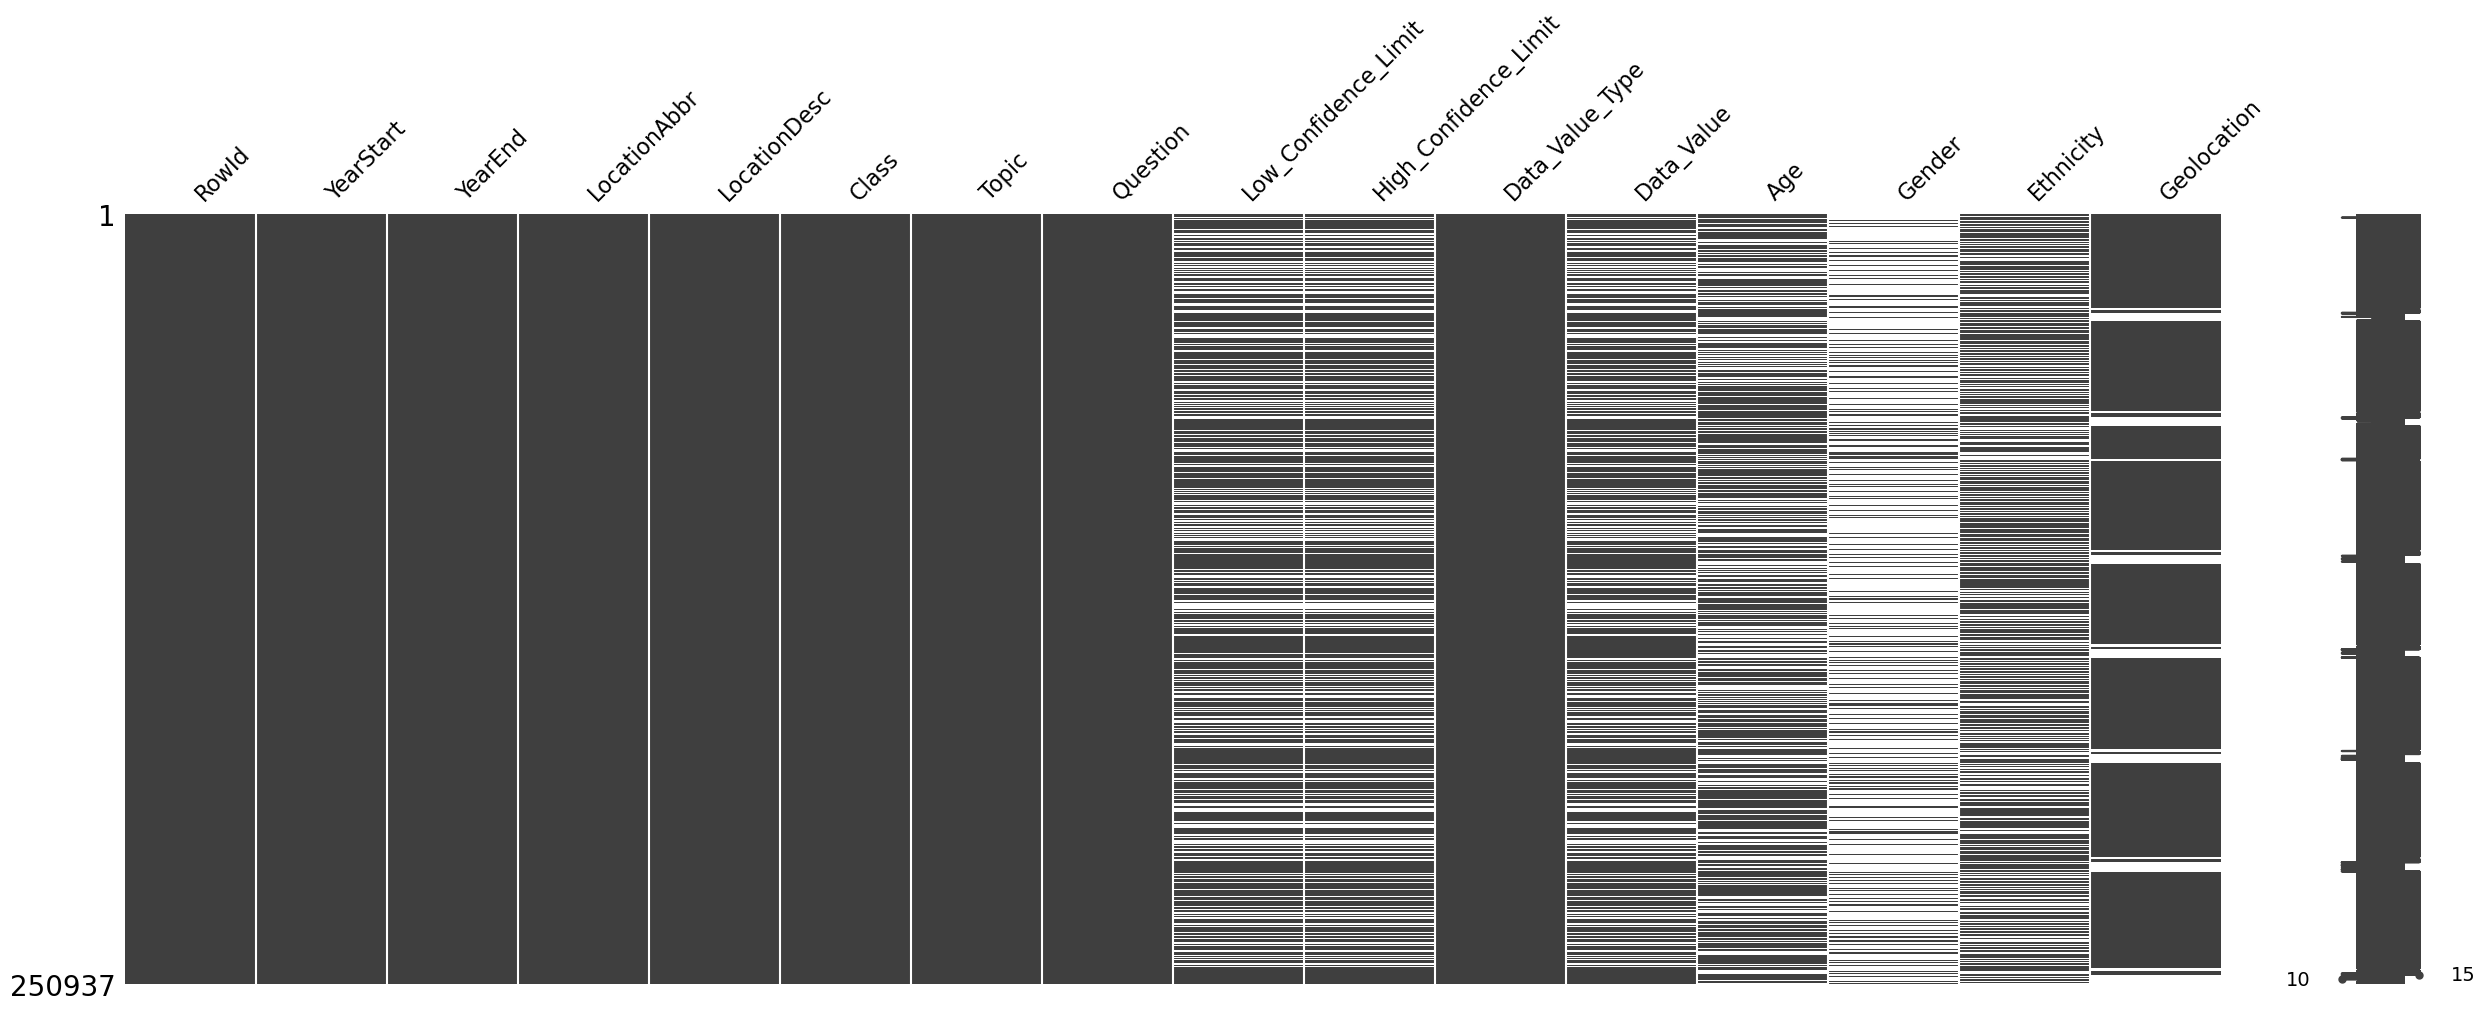

In [31]:
missingno.matrix(Alzheimers, figsize = (30,10))
plt.show()

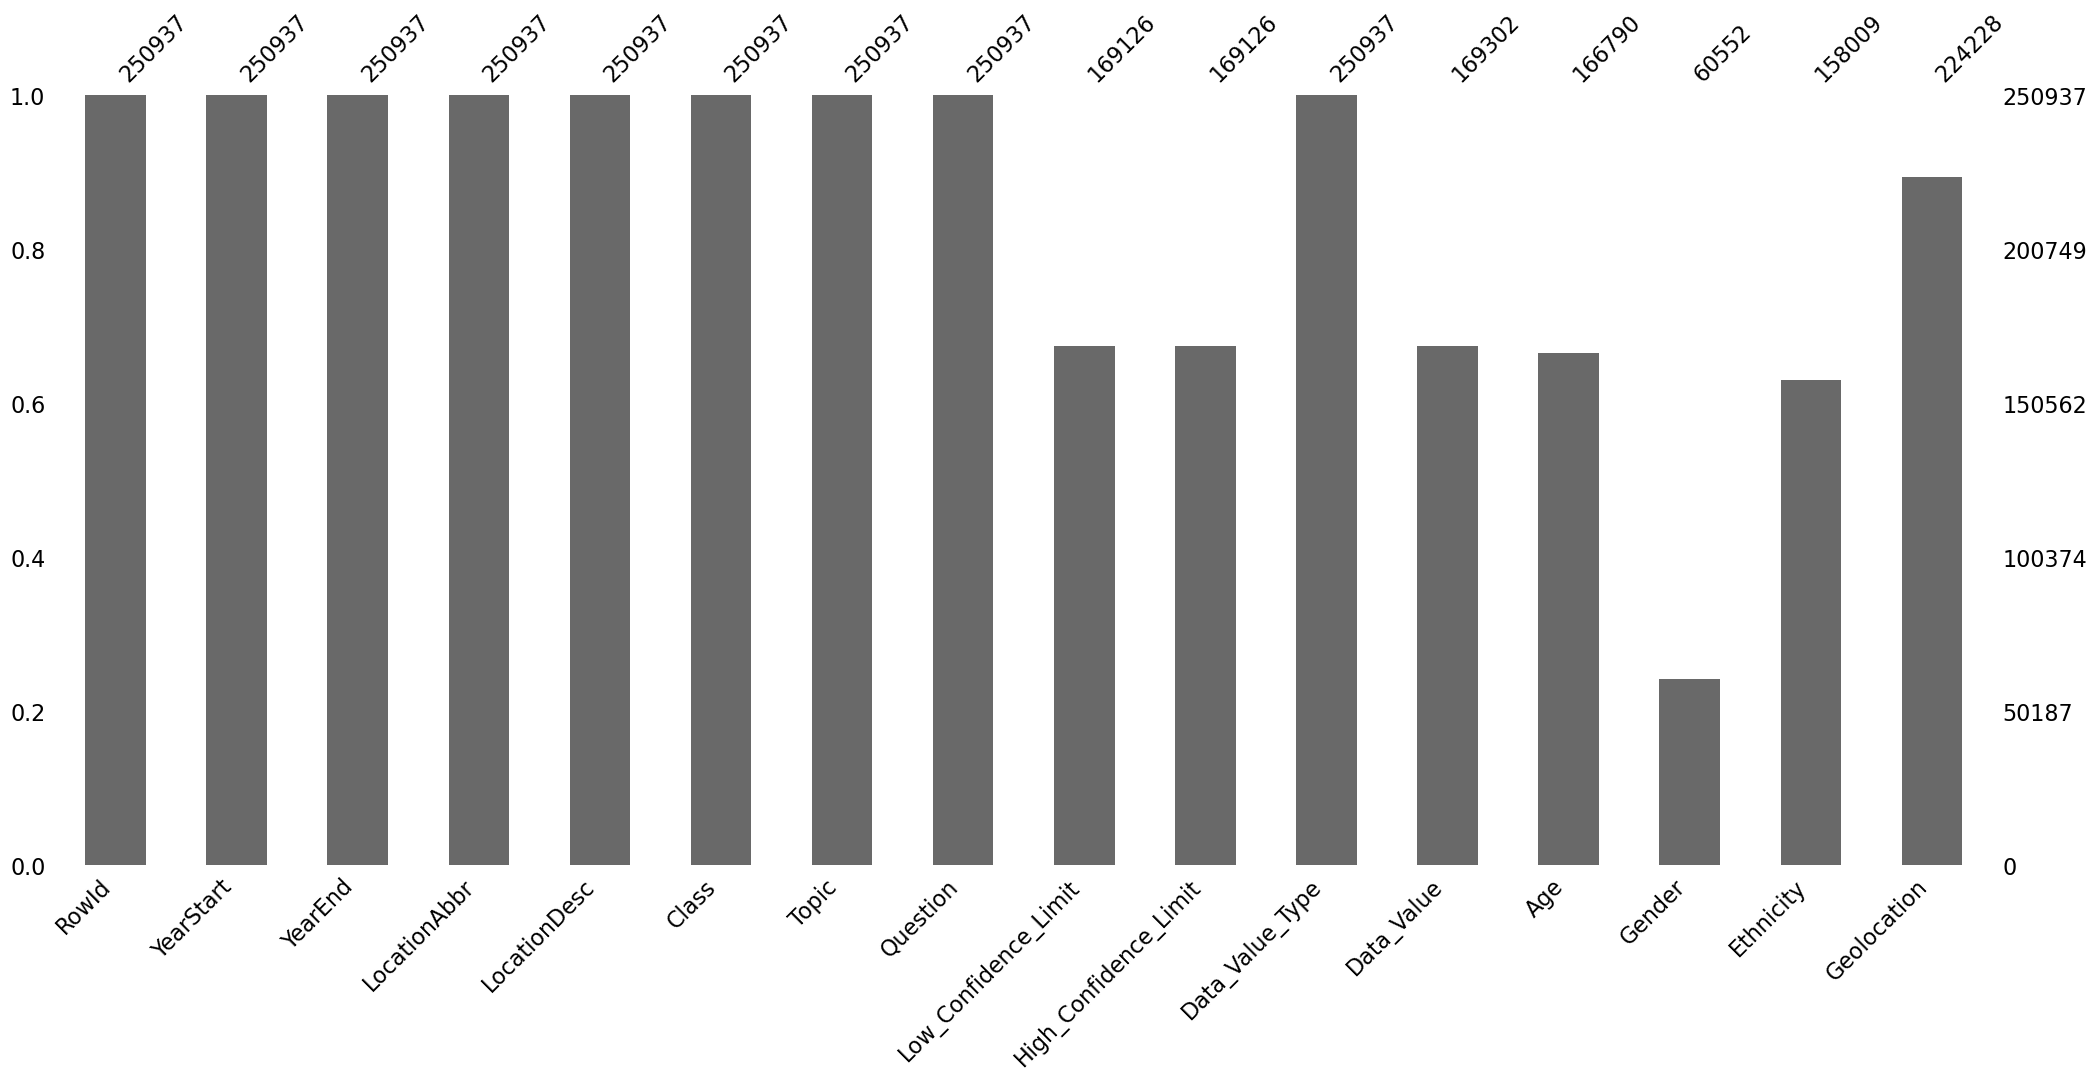

In [33]:
missingno.bar(Alzheimers)
plt.show()